In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
my_df = pd.DataFrame(iris.data, columns=iris.feature_names)
my_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
my_df = my_df.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
my_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [4]:
from sklearn.cluster import KMeans
rng = range(1,10)
sse = []
for k in rng:
  km = KMeans(n_clusters=k)
  km.fit(my_df)
  sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

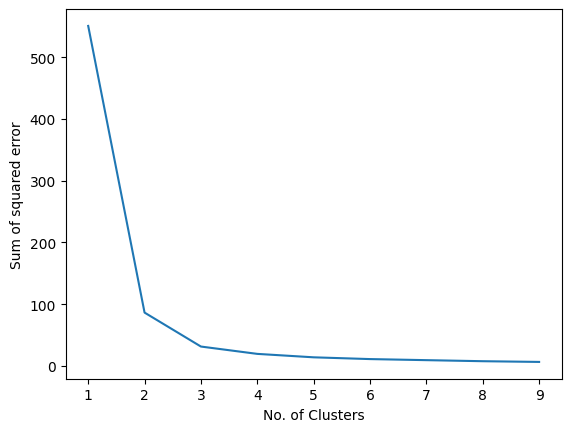

In [5]:
plt.plot(rng, sse)
plt.ylabel('Sum of squared error')
plt.xlabel('No. of Clusters')
plt.show()

In [6]:
# At Elbow=2
km = KMeans(n_clusters=2)
#Fit and predict
my_df['Cluster']= km.fit_predict(my_df)
# my_df['Cluster'] = km.fit_predict(my_df[['Age', 'Income']])
my_df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


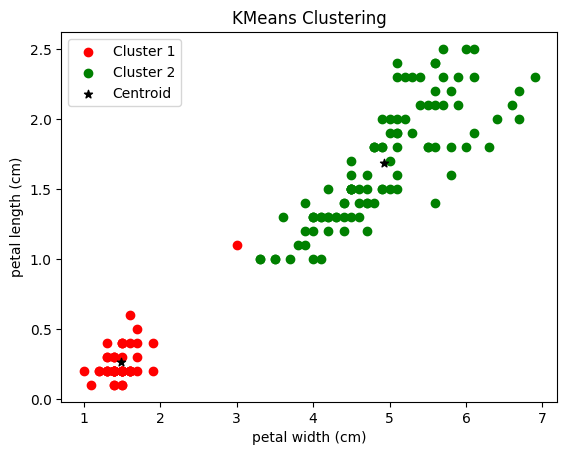

In [9]:
# Visualize the Clusters
df0 = my_df[my_df['Cluster'] == 0]
df1 = my_df[my_df['Cluster'] == 1]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:, 1], color='black', marker='*', label='Centroid')
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.title('KMeans Clustering')
plt.legend()
plt.show()